In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

df = pd.read_csv("openaq.csv", sep=';')

print(df.isnull().sum())

# last updated convert to date time
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df[df["Value"] > 0]
print(df.dtypes)

df.head()


/Users/luuvan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Country Code         0
City             29146
Location             2
Coordinates         70
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      127
dtype: int64
Country Code                        object
City                                object
Location                            object
Coordinates                         object
Pollutant                           object
Source Name                         object
Unit                                object
Value                              float64
Last Updated     datetime64[ns, UTC+07:00]
Country Label                       object
dtype: object


,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,ZA,Alfred Nzo,Luka,"-25.5077634717075, 27.1838594119125",PM10,South Africa,µg/m³,20.0000,2023-04-25 06:00:00+07:00,South Africa
1,IN,NaN,"ICRISAT Patancheru, Hyderabad - TSPCB","17.5184, 78.278777",SO2,caaqm,µg/m³,8.9000,2022-10-31 08:45:00+07:00,India
2,IT,via Cadello CAGLIARI - Cagliari (CA),CENCA1,"39.23583300015611, 9.115000000173477",SO2,eea,µg/m³,0.5123,2025-01-12 04:00:00+07:00,Italy
3,JP,NaN,南アルプス市鏡中條１６４２－２,"35.601667, 138.498611",NO2,japan-soramame,ppm,0.0020,2024-09-23 14:00:00+07:00,Japan
4,KR,NaN,대불,"34.757839999999995, 126.452808",PM10,korea-air,µg/m³,24.0000,2025-01-28 16:00:00+07:00,"Korea, Republic of"


In [2]:
import pycountry

# filling country label missing by using country code
def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2 = country_code).name
    except:
        return None

def fill_country_label(row):
    if pd.notnull(row["Country Label"]):
        return row["Country Label"]
    else:
        return get_country_name(row["Country Code"])
df["Country Label"] = df.apply(fill_country_label, axis=1)
missing_codes = df[df["Country Label"].isna()]["Country Code"].unique()

print(missing_codes)

manual_map = {
    "AJ": "Azerbaijan",
    "VM": "Viet Nam",
    "XK": "Kosovo",
    "-99": "Unknown",
    "CE": "Sri Lanka",
    "BK": "Bosnia and Herzegovina",
    "UC": "Ukraine",
    "TI": "Tajikistan",
    "TX": "Turkmenistan",
    "KV": "Kosovo",
    "IZ": "Iraq",
    "KU": "Kuwait"
}

def manual_fill(row):
    if pd.isna(row["Country Label"]):
        return manual_map.get(row["Country Code"], row["Country Label"])
    else:
        return row["Country Label"]
    
df["Country Label"] = df.apply(manual_fill, axis=1)

print(df.isnull().sum())

['AJ' 'VM' 'XK' '-99' 'CE' 'BK' 'TI' 'TX' 'KV' 'IZ' 'UC']
Country Code         0
City             27308
Location             2
Coordinates         65
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label        0
dtype: int64


In [3]:
def fill_city(row):
    if pd.notnull(row["City"]):
        return row["City"]
    elif pd.notnull(row["Location"]):
        return row["Location"].split(",")[0].strip()
    else:
        return "Unknown" + str(row["Country Label"])

df["City"] = df.apply(fill_city, axis=1)
print(df.isnull().sum())


Country Code      0
City              0
Location          2
Coordinates      65
Pollutant         0
Source Name       0
Unit              0
Value             0
Last Updated      0
Country Label     0
dtype: int64


In [4]:
def fill_coordinates(row):
    if pd.notnull(row["Coordinates"]):
        return row["Coordinates"]
    else:
        return "Unknown"

df["Coordinates"] = df.apply(fill_coordinates, axis=1)
print(df.isnull().sum())


Country Code     0
City             0
Location         2
Coordinates      0
Pollutant        0
Source Name      0
Unit             0
Value            0
Last Updated     0
Country Label    0
dtype: int64


In [5]:
print(df[df["Location"].isna()]) 
df["Location"] = df["Location"].fillna("MC CRACKEN")
print(df.isnull().sum())

#save cleaned data
df.to_csv("cleaned_openaq.csv", index=False)

      Country Code        City Location          Coordinates Pollutant  \
14954           US  MC CRACKEN      NaN  37.08725, -88.60802     PM2.5   
19116           US  MC CRACKEN      NaN  37.08725, -88.60802        O3   

      Source Name   Unit   Value              Last Updated  Country Label  
14954      AirNow  µg/m³  13.000 2023-05-30 14:00:00+07:00  United States  
19116      AirNow    ppm   0.011 2023-05-30 14:00:00+07:00  United States  
Country Code     0
City             0
Location         0
Coordinates      0
Pollutant        0
Source Name      0
Unit             0
Value            0
Last Updated     0
Country Label    0
dtype: int64


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

df = pd.read_csv("cleaned_openaq.csv")
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
print(df.isnull().sum())
df.head()


Country Code     0
City             0
Location         0
Coordinates      0
Pollutant        0
Source Name      0
Unit             0
Value            0
Last Updated     0
Country Label    0
dtype: int64


,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,ZA,Alfred Nzo,Luka,"-25.5077634717075, 27.1838594119125",PM10,South Africa,µg/m³,20.0000,2023-04-25 06:00:00+07:00,South Africa
1,IN,ICRISAT Patancheru,"ICRISAT Patancheru, Hyderabad - TSPCB","17.5184, 78.278777",SO2,caaqm,µg/m³,8.9000,2022-10-31 08:45:00+07:00,India
2,IT,via Cadello CAGLIARI - Cagliari (CA),CENCA1,"39.23583300015611, 9.115000000173477",SO2,eea,µg/m³,0.5123,2025-01-12 04:00:00+07:00,Italy
3,JP,南アルプス市鏡中條１６４２－２,南アルプス市鏡中條１６４２－２,"35.601667, 138.498611",NO2,japan-soramame,ppm,0.0020,2024-09-23 14:00:00+07:00,Japan
4,KR,대불,대불,"34.757839999999995, 126.452808",PM10,korea-air,µg/m³,24.0000,2025-01-28 16:00:00+07:00,"Korea, Republic of"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Nepal'),
  Text(2, 0, 'Ghana'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'Peru'),
  Text(5, 0, 'Korea, Republic of'),
  Text(6, 0, 'Macedonia, The former Yugoslav Rep. of'),
  Text(7, 0, 'Malta'),
  Text(8, 0, 'Greece'),
  Text(9, 0, 'Bulgaria')])

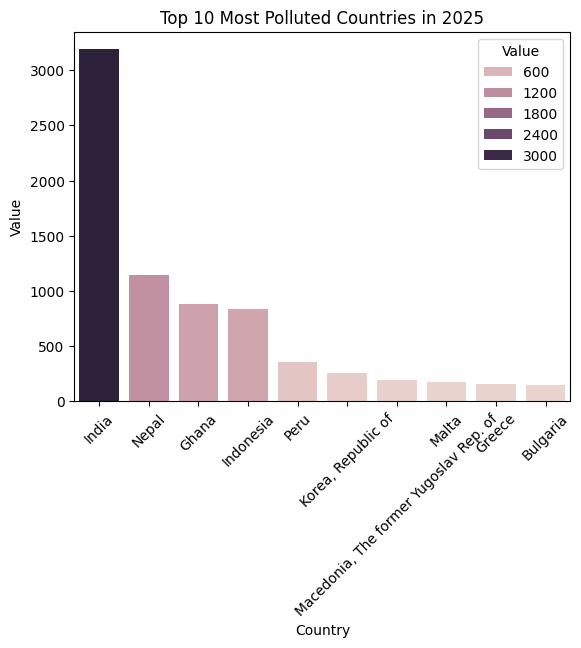

In [15]:
# top 10 most polluted country in 2024
df2025 = df[df["Last Updated"].dt.year == 2025]
countryPollution = df2025.groupby("Country Label")["Value"].mean().reset_index()
countryPollution = countryPollution.sort_values(by= "Value" ,ascending=False).head(10)




sns.barplot(
    data=countryPollution,
    x="Country Label",
    y="Value",
    hue="Value"
)

plt.title("Top 10 Most Polluted Countries in 2025")
plt.xlabel("Country")
plt.ylabel("Value")
plt.xticks(rotation=45)

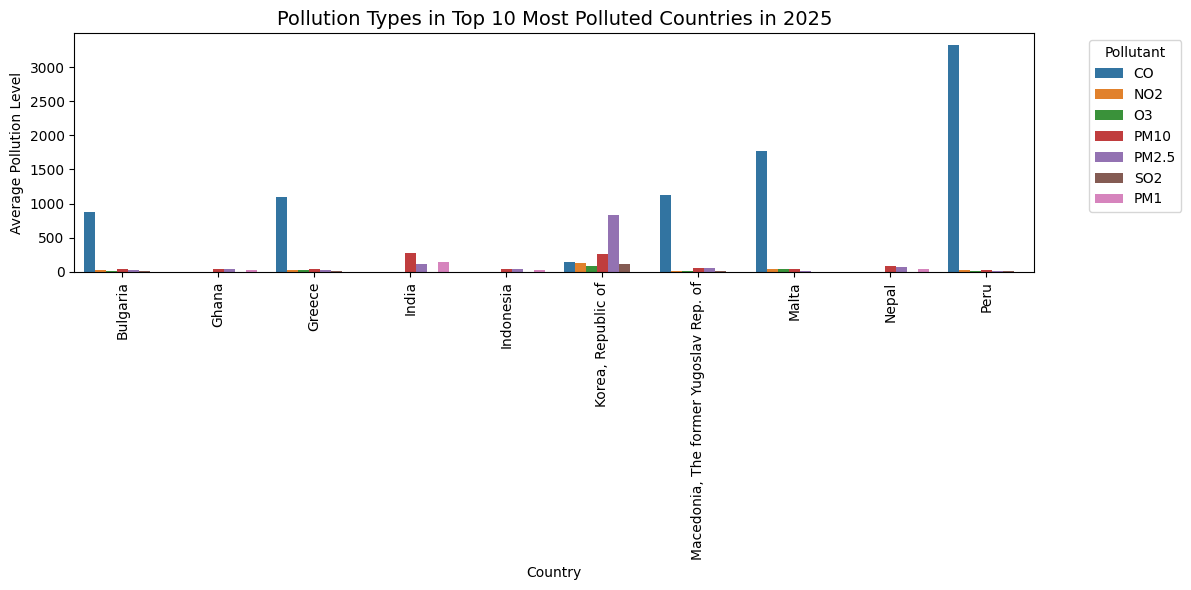

In [18]:
pollutant = df2025[df2025["Country Label"].isin(countryPollution["Country Label"])]
pollutant = pollutant.groupby(["Country Label", "Pollutant"])["Value"].mean().reset_index()
filter = ["PM10", "PM2.5", "O3", "CO", "NO2", "SO2", "PM1"]
pollutant = pollutant[pollutant["Pollutant"].isin(filter)]
plt.figure(figsize=(12,6))
sns.barplot(
    data=pollutant,
    x="Country Label",
    y="Value",
    hue="Pollutant"
)

plt.title("Pollution Types in Top 10 Most Polluted Countries in 2025", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Average Pollution Level")
plt.xticks(rotation=90)
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [9]:
df2025 = df[df["Last Updated"].dt.year == 2025]
countryPollution = df2025.groupby("Country Label")["Value"].mean().reset_index()
fig = px.choropleth(
    countryPollution,
    locations="Country Label",
    locationmode="country names",
    color="Value",
    hover_name="Country Label",
    color_continuous_scale="Reds",
    projection="natural earth",
    title="Global Pollution Levels in 2025",
    width=700,
    height=500,
)
fig.show()
print(countryPollution)

     Country Label       Value
0          Algeria   14.000000
1          Andorra   93.571429
2        Argentina    2.753375
3        Australia   15.505191
4          Austria   47.443542
..             ...         ...
63           Spain   47.079870
64       Sri Lanka   10.000000
65     Switzerland  106.892796
66  United Kingdom   42.397152
67         Unknown   23.888350

[68 rows x 2 columns]


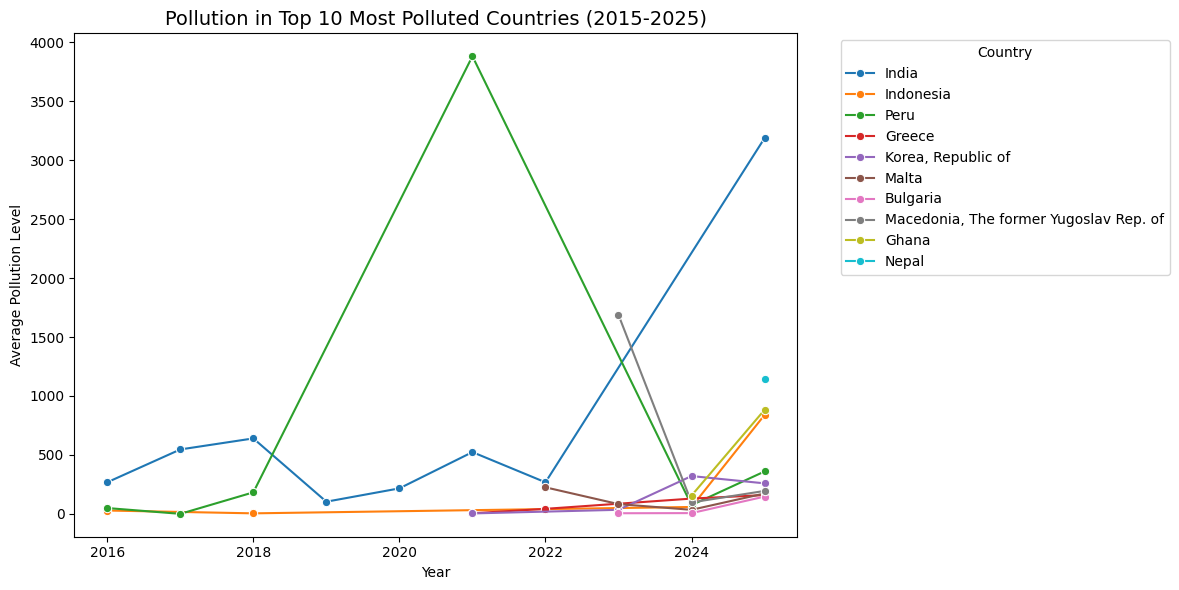

In [20]:
top10_2025 = df2025.groupby("Country Label")["Value"].mean().reset_index()
top10_2025 = top10_2025.sort_values(by= "Value" ,ascending=False).head(10)
data =  df[df["Country Label"].isin(top10_2025["Country Label"]) & (df["Last Updated"].dt.year.between(2015, 2025))]
dataYearly = data.groupby([data["Last Updated"].dt.year, "Country Label"])["Value"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=dataYearly,
    x="Last Updated",
    y="Value",
    hue="Country Label",
    marker="o"
)

plt.title("Pollution in Top 10 Most Polluted Countries (2015-2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Pollution Level")
plt.legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()

Text(0, 0.5, 'Pollution Level')

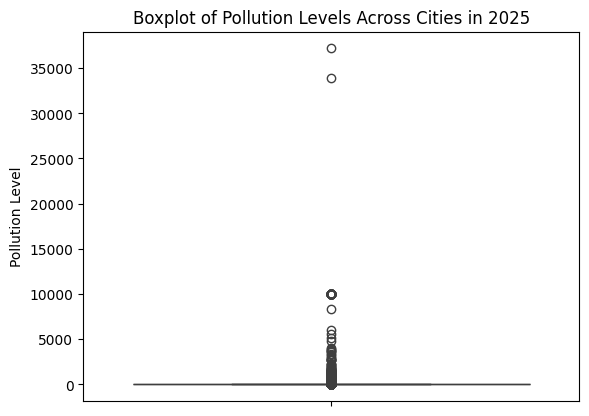

In [24]:


sns.boxplot(
    data= df2025,
    y="Value",

)
plt.title("Boxplot of Pollution Levels Across Cities in 2025")
plt.ylabel("Pollution Level")

In [12]:
import country_converter as coco

cc = coco.CountryConverter()
df["Region"] = cc.convert(names=df["Country Label"], to="continent")
df2025 = df[df["Last Updated"].dt.year == 2025]


Unknown not found in regex
Unknown not found in regex
USSR not found in regex
Unknown not found in regex
Serbia and Montenegro not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex


Text(0.5, 1.0, 'Global Regional pollution in 2025')

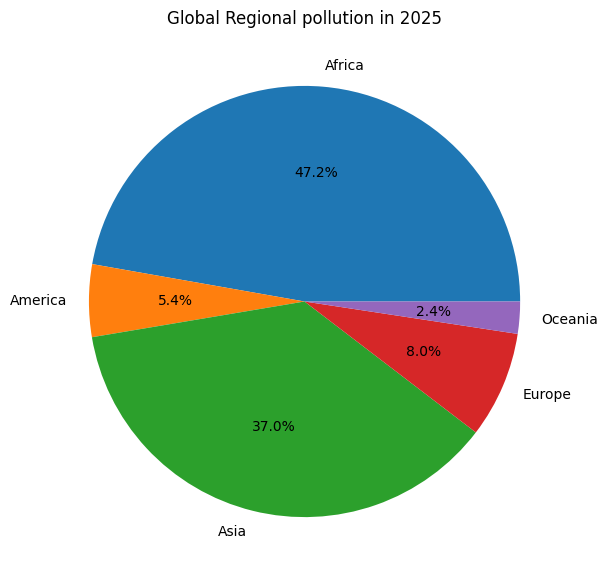

In [25]:
# filter not found
region = df2025.groupby("Region")["Value"].mean().reset_index()
region = region[region["Region"] != "not found"]




plt.figure(figsize=(7, 7))
plt.pie(
    region["Value"],
    labels=region["Region"],
    autopct="%1.1f%%",  
)

plt.title("Global Regional pollution in 2025")

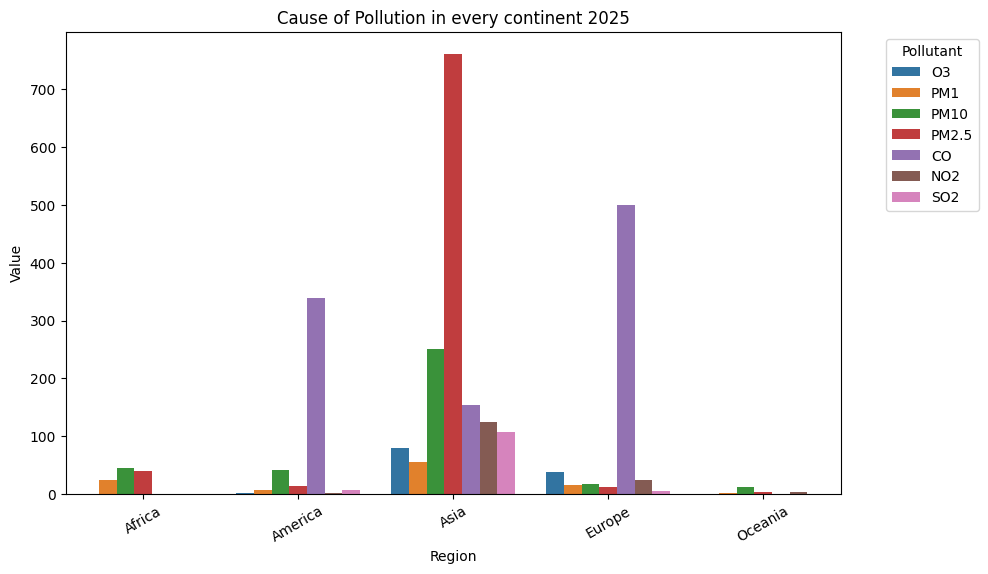

In [32]:
cause_of_pollution = df2025.groupby(["Region", "Pollutant"])["Value"].mean().reset_index()
cause_of_pollution = cause_of_pollution[cause_of_pollution["Region"] != "not found"]
filter = ["PM10", "PM2.5", "O3", "CO", "NO2", "SO2", "PM1"]
cause_of_pollution = cause_of_pollution[cause_of_pollution["Pollutant"].isin(filter)]

plt.figure(figsize=(10,6))
sns.barplot(data=cause_of_pollution, x="Region", y="Value", hue="Pollutant")

plt.title("Cause of Pollution in every continent 2025")
plt.xticks(rotation=30)
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')